In [ ]:
# Run this cell once if kagglehub is not installed (e.g. in VS Code / local Jupyter)
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("victoraiyewumi/co2-emission-africa")

print("Path to dataset files:", path)

100%|██████████| 40.5k/40.5k [00:00<00:00, 9.84MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/victoraiyewumi/co2-emission-africa/versions/3


In [ ]:
import pandas as pd
import numpy as np
import os
import time
from pca_africa import (
    load_data, clean_data, optimized_pca, naive_pca,
    plot_scree, plot_before_after_pca, plot_performance,
    explain_variance, standardize_data
)

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'co2 Emission Africa.csv')

# Load the dataset (using project path when running locally)
df = pd.read_csv(csv_file_path)

# Display basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape of dataset: (1134, 20)

First 5 rows:


,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


In [ ]:
print("Missing values per column:\n")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per column:

Country                                     0
Sub-Region                                  0
Code                                        0
Year                                        0
Population                                  0
GDP PER CAPITA (USD)                       27
GDP PER CAPITA PPP (USD)                   48
Area (Km2)                                  0
Transportation (Mt)                        12
Total CO2 Emission including LUCF (Mt)      0
Total CO2 Emission excluding LUCF (Mt)      0
Other Fuel Combustion (Mt)                 12
Manufacturing/Construction (Mt)            12
Land-Use Change and Forestry (Mt)           0
Industrial Processes (Mt)                  62
Fugitive Emissions (Mt)                   804
Energy (Mt)                                 0
Electricity/Heat (Mt)                      12
Bunker Fuels (Mt)                          12
Building (Mt)                              12
dtype: int64

Total missing values: 1013


In [ ]:
# Clean data using pca_africa (drops columns with >=500 missing, fills rest)
df_numeric, labels = clean_data(df, drop_threshold=500)
numeric_data = df_numeric.values

# Confirm no missing values remain
print("Missing values after cleaning:\n", df_numeric.isnull().sum())
print(f"\nCleaned numeric data shape: {df_numeric.shape}")
print(f"\nColumns used for PCA:\n{list(df_numeric.columns)}")

Missing values after cleaning:
 Year                                      0
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Fugitive Emissions (Mt)                   0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
dtype: int64

Cleaned numeric data shape: (1134, 16)

Columns used for PCA:
['Year', 'Population', 'GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)', 'Area (Km2)', 'Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)', 'Total CO2 Emission excluding LUCF

In [ ]:
# Standardize using pca_africa
standardized_data = standardize_data(numeric_data)

# Display the first 5 rows of standardized data
print("Standardized data shape:", standardized_data.shape)
print("\nFirst 5 rows of standardized data:")
print(standardized_data[:5])



Standardized data shape: (1134, 16)

First 5 rows of standardized data:
[[-1.65144565  0.38317864 -0.14979882  0.58103368  3.05168117  1.10713976
   0.44234307  0.9529011  -0.36703566  0.46538489 -0.29708947  0.94269542
   2.37397946  0.52023273  0.63993782  1.8405272 ]
 [-1.48630108  0.39800079 -0.15858975  0.63741427  3.05168117  1.12476223
   0.39313981  0.93037808 -0.36703566  0.4769821  -0.34168002  0.93564728
   1.700219    0.54716266  0.65054852  1.88726858]
 [-1.32115652  0.41273071 -0.14488203  0.72507209  3.05168117  1.33994188
   0.43537823  0.99070759 -0.36703566  0.52465952 -0.34168002  1.03784533
   1.31321473  0.60154545  0.75135019  1.97140306]
 [-1.15601195  0.42772053 -0.03508398  0.85033631  3.05168117  1.56254152
   0.50030856  1.08385635 -0.36703566  0.5749141  -0.34168002  1.02727311
   1.77249088  0.60808184  0.60280037  2.1560315 ]
 [-0.99086739  0.44351395  0.1379236   0.9468188   3.05168117  1.58758398
   0.51502461  1.10477058 -0.36703566  0.71408063 -0.34168

In [ ]:
# Calculate the covariance matrix (observations are rows, so rowvar=False)
cov_matrix = np.cov(standardized_data, rowvar=False)

print("Covariance Matrix Shape:", cov_matrix.shape)
print("\nCovariance Matrix:")
print(cov_matrix)

Covariance Matrix Shape: (16, 16)

Covariance Matrix:
[[ 1.00088261e+00  1.05901241e-01  1.58718195e-01  1.26239862e-01
   1.56783481e-18  1.13424648e-01  5.86267455e-02  5.25286969e-02
   7.40201183e-02  3.21775338e-02  2.92341993e-02  9.22863433e-02
  -7.65912417e-02  3.39776355e-02  2.58788632e-03  4.85781052e-02]
 [ 1.05901241e-01  1.00088261e+00 -1.18302546e-01 -8.36151244e-02
   4.51361803e-01  6.66301607e-01  5.57721674e-01  4.54992213e-01
   4.76559964e-01  4.09280468e-01  3.19698132e-01  5.61209144e-01
   4.27356444e-01  2.99241462e-01  4.02711090e-01  3.74877884e-01]
 [ 1.58718195e-01 -1.18302546e-01  1.00088261e+00  9.48285418e-01
   6.88665850e-03  1.99454724e-01  6.84147809e-02  2.27530018e-01
   1.63249226e-01  1.97709052e-01 -1.20501171e-01  9.55868180e-02
  -2.17989257e-02  2.25050211e-01  2.46712060e-01  1.98448557e-01]
 [ 1.26239862e-01 -8.36151244e-02  9.48285418e-01  1.00088261e+00
   9.26893000e-02  2.89592969e-01  9.16881034e-02  2.84262324e-01
   2.03170988e-01  

In [ ]:
# Eigenvalues and eigenvectors are computed inside pca_africa.optimized_pca()
# Results are in optimized_result (see next cells).

Eigenvalues (sorted descending):
[7.77242730e+00 2.29266248e+00 1.60677572e+00 1.38604182e+00
 1.01101259e+00 6.31473451e-01 5.18309327e-01 3.04867995e-01
 2.20229130e-01 9.23698846e-02 8.02668584e-02 4.57752302e-02
 3.54195178e-02 1.51859926e-02 1.30450275e-03 1.32227530e-09]

Eigenvectors shape: (16, 16)


In [ ]:

# Calculate explained variance ratio for each component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print all values clearly
print("Component | Explained Variance | Cumulative Variance")
print("-" * 55)
for i in range(len(eigenvalues)):
    print(f"    PC{i+1:2d}   |       {explained_variance_ratio[i]:.4f}       |       {cumulative_variance[i]:.4f}")

# Dynamically select number of components where cumulative variance >= 95%
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"\n Threshold: {threshold * 100}%")
print(f"Number of components selected dynamically: {num_components}")
print(f" Cumulative variance explained by {num_components} components: {cumulative_variance[num_components - 1]:.4f} ({cumulative_variance[num_components - 1] * 100:.2f}%)")


Component | Explained Variance | Cumulative Variance
-------------------------------------------------------
    PC 1   |       0.4853       |       0.4853
    PC 2   |       0.1432       |       0.6285
    PC 3   |       0.1003       |       0.7288
    PC 4   |       0.0866       |       0.8154
    PC 5   |       0.0631       |       0.8785
    PC 6   |       0.0394       |       0.9180
    PC 7   |       0.0324       |       0.9503
    PC 8   |       0.0190       |       0.9694
    PC 9   |       0.0138       |       0.9831
    PC10   |       0.0058       |       0.9889
    PC11   |       0.0050       |       0.9939
    PC12   |       0.0029       |       0.9968
    PC13   |       0.0022       |       0.9990
    PC14   |       0.0009       |       0.9999
    PC15   |       0.0001       |       1.0000
    PC16   |       0.0000       |       1.0000

 Threshold: 95.0%
Number of components selected dynamically: 7
 Cumulative variance explained by 7 components: 0.9503 (95.03%)


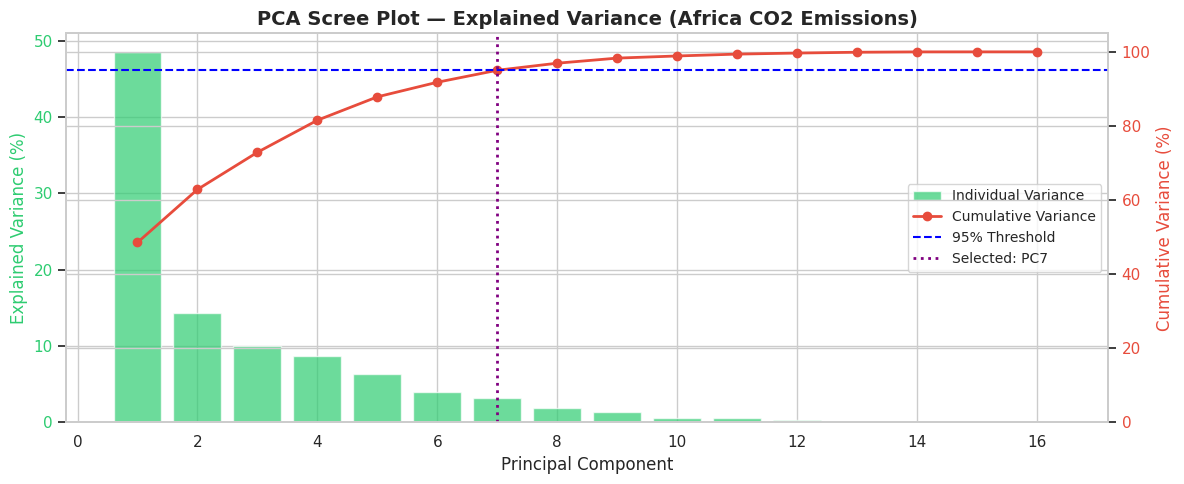

In [ ]:
# Run optimized PCA and plot scree (using pca_africa)
optimized_result = optimized_pca(numeric_data, threshold=0.95)
plot_scree(optimized_result)


In [ ]:
# Get reduced data from optimized_result (from pca_africa)
reduced_data = optimized_result['reduced_data']

print(f"Original data shape:  {standardized_data.shape}")
print(f"Reduced data shape:   {reduced_data.shape}")
print(f"\nFirst 5 rows of reduced (projected) data:")
print(reduced_data[:5])


Original data shape:  (1134, 16)
Reduced data shape:   (1134, 7)

First 5 rows of reduced (projected) data:
[[-2.78204658  1.03906981 -0.07189642 -1.96637749  2.53435109 -0.992431
  -2.11582615]
 [-2.77707207  0.88303041  0.03201613 -1.54204144  2.23326162 -1.29537131
  -2.06362585]
 [-3.00364575  0.77391684  0.12355289 -1.32910511  1.99494963 -1.49000481
  -2.00526914]
 [-3.21211405  0.7360201   0.1883241  -1.75153103  1.96723126 -1.295638
  -2.11787354]
 [-3.49512591  0.55481092  0.29972515 -1.68574321  1.7639476  -1.5296218
  -2.00362287]]


**Explanation of the changes due to PCA:** The left plot shows the original standardized data in the space of the first two features (Year and Population). The right plot shows the same data after PCA: each point is projected onto the first two principal components (PC1 and PC2). The number of points is unchanged and cluster structure (e.g. by Sub-Region) is preserved but rotated—PCA finds directions of maximum variance, so PC1 aligns with the direction of greatest spread and PC2 with the next largest, orthogonal to PC1. By reducing 16 features to 2 components we retain most of the variance (e.g. 95% with the chosen threshold) while simplifying the representation and often making patterns (like regional groupings) easier to see.

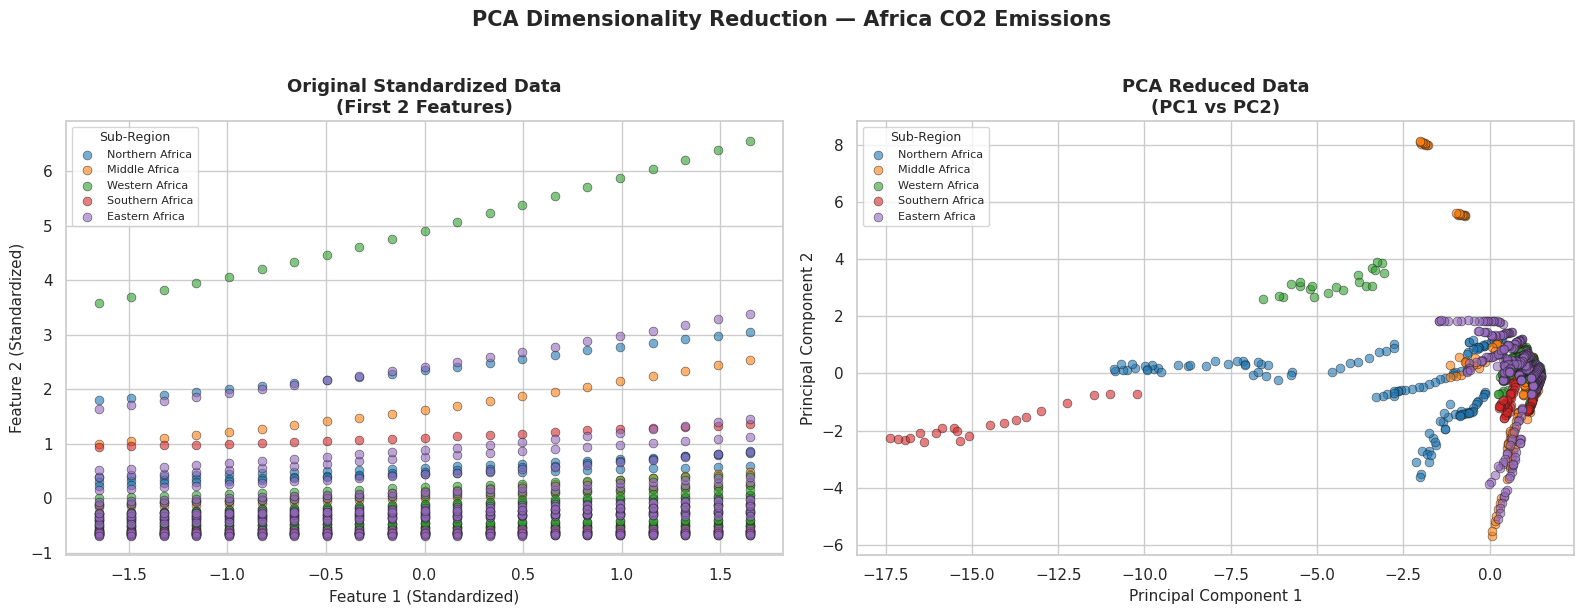

In [ ]:
# Before/after PCA plot (using pca_africa)
plot_before_after_pca(
    standardized_data,
    reduced_data,
    labels=labels['Sub-Region'].values if labels is not None else None,
    feature_names=('Year', 'Population'),
    figsize=(16, 6)
)


In [ ]:
# Optimized PCA is from pca_africa and was already run in cell 8 (optimized_result).
# The next cell benchmarks naive vs optimized PCA from the library.



TASK 3: OPTIMIZED PCA — PERFORMANCE BENCHMARK

  Optimized PCA execution time:  0.002933 seconds
Input data shape:              (1134, 16)
Output (reduced) data shape:   (1134, 7)
Components selected:           7
Variance explained:            95.03%


In [ ]:
# Use library's naive_pca and optimized_pca; num_components from cell 8 result
num_components = optimized_result['num_components']
num_runs = 50

# Naive timing (pca_africa)
naive_times = []
for _ in range(num_runs):
    start = time.time()
    naive_pca(numeric_data, num_components)
    naive_times.append(time.time() - start)

# Optimized timing (pca_africa)
optimized_times = []
for _ in range(num_runs):
    start = time.time()
    optimized_pca(numeric_data, threshold=0.95)
    optimized_times.append(time.time() - start)

avg_naive = np.mean(naive_times)
avg_optimized = np.mean(optimized_times)
speedup = avg_naive / avg_optimized

print("=" * 60)
print("PERFORMANCE COMPARISON (averaged over 50 runs)")
print("=" * 60)
print(f"  Naive PCA avg time:      {avg_naive:.6f} seconds")
print(f"  Optimized PCA avg time:  {avg_optimized:.6f} seconds")
print(f"  Speedup:                 {speedup:.2f}x faster")
print("=" * 60)



PERFORMANCE COMPARISON (averaged over 50 runs)
  Naive PCA avg time:      0.000561 seconds
  Optimized PCA avg time:  0.000477 seconds
  Speedup:                 1.18x faster


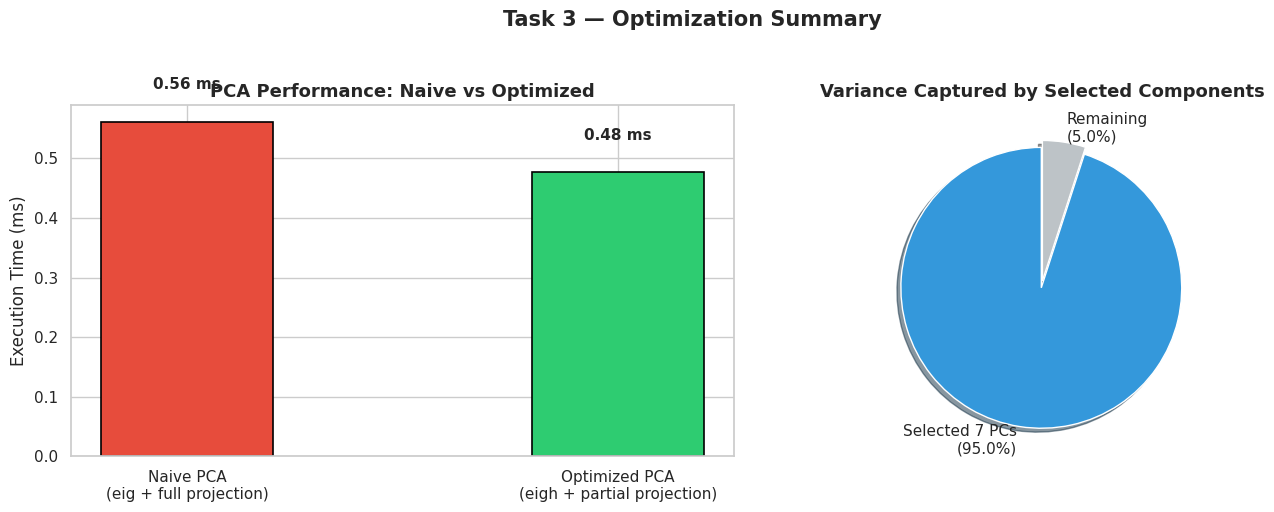

In [ ]:
# Performance and variance summary (using pca_africa)
plot_performance(avg_naive, avg_optimized, optimized_result)




In [ ]:
# Variance summary (using pca_africa)
explain_variance(optimized_result)


         PCA FINAL SUMMARY — Africa CO2 Emissions
  Original number of features:     16
  Number of samples:               1134
  Components selected (dynamic):   7
  Variance explained:              95.03%
  Dimensionality reduction:        16D → 7D

Top Eigenvalues:
  PC1: eigenvalue = 7.7724 | variance = 48.53%
  PC2: eigenvalue = 2.2927 | variance = 14.32%
  PC3: eigenvalue = 1.6068 | variance = 10.03%
  PC4: eigenvalue = 1.3860 | variance = 8.66%
  PC5: eigenvalue = 1.0110 | variance = 6.31%
